# Real Time Premium Check

In [1]:
# Exchange Rate > EXR in late codes
# Memo: 환율이 낮을 때 원을 달러로 바꾸고 환율이 높을 때 달러를 원으로

import requests
import json

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

def upbit_get_usd_krw():
    url = 'https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD'
    exchange =requests.get(url, headers=headers).json()
    return exchange[0]['basePrice']

# print(upbit_get_usd_krw())


In [2]:
 # Target Ticker : XLM

import ccxt
import pyupbit

def get_premium_XLM():
    binance = ccxt.binance()
    # ticker = binance.fetch_ticker('XLM/USDT')
    # print(ticker['open'], ticker['high'], ticker['low'], ticker['close'])

    EXR = upbit_get_usd_krw()

    orderbook_us = binance.fetch_order_book('XLM/USDT')
    # for ask in orderbook_us['asks']:
    #     print(ask[0]*EXR,ask[1])
    us_ask = orderbook_us['asks'][0][0]*EXR
    # print('us_ask: ',us_ask)

    orderbook_kr = pyupbit.get_orderbook('KRW-XLM')
    # for ask in orderbook_kr['orderbook_units']:
    #    print(ask)
    kr_bid = orderbook_kr['orderbook_units'][0]['bid_price']
    # print('kr_bid: ',kr_bid)

    prem = (kr_bid-us_ask)/kr_bid
    
    return (prem,kr_bid,us_ask)

ret = get_premium_XLM()
print(ret[0],ret[1],ret[2])
# print(prem)

# markets = binance.fetch_tickers()
# print(markets.keys())
# print('XLM/USDT' in markets.keys())

0.01523734177215189 316.0 311.185


거래순서
1. prem < -0.02 시 XLM upbit에서 매수
2. transfer XLM from "upbit" to "binance"
3. prem > 0 XLM binance에서 매수
4. transfer XLM from 'binance' tp 'upbit'

In [19]:
# secret key managment
import json, pyupbit, json
key_file = 'keys.json'
with open(key_file,'r',encoding="UTF-8") as f:
    keys = json.loads(f.read())
f.close()

upbit = pyupbit.Upbit(keys["ACCESS_KEY"],keys["SECRET_KEY"])
binance = ccxt.binance()
ticker_kr = 'KRW-XLM'
ticker_us = 'XLM/USDT'

print(upbit.get_balances())
print(upbit.get_balance(ticker='KRW-XLM'))

[{'currency': 'KRW', 'balance': '3997.0000015', 'locked': '0.0', 'avg_buy_price': '0', 'avg_buy_price_modified': True, 'unit_currency': 'KRW'}, {'currency': 'XLM', 'balance': '19.10828025', 'locked': '0.0', 'avg_buy_price': '314', 'avg_buy_price_modified': False, 'unit_currency': 'KRW'}]
19.10828025


In [15]:
# BUY at KR(upbit) / market fee = 0.05%
# 시장가에 전량 매수
ret = upbit.buy_market_order('KRW-XLM',upbit.get_balance(ticker="KRW"))
print(ret)

400
최소주문금액 이상으로 주문해주세요
under_min_total_bid
UpbitError


In [ ]:
# Transfer from KR to US
us_addr = ''
us_addr2 = ''
ret = upbit.withdraw_coin('KRW-XLM',upbit.get_balance(ticker="KRW-XLM"),addr,addr2)
print(ret)

In [38]:
# SELL at US(binance) / market fee = 0.10%
ret = binance.create_market_sell_order('XLM/USDT',binance.fetch_balance()['XLM']['free'])
print(ret)

False


In [ ]:
# BUY at US(binance) / market fee = 0.10%
ret = binance.create_market_buy_order('XLM/USDT',binance.fetch_balance()['USDT']['free'])
print(ret)

In [ ]:
# Transfer from US to KR
kr_addr = ''
ret = binance.withdraw('XLM',binance.fetch_balance()['XLM']['free'],kr_addr)
print(ret)

In [33]:
# SELL at KR(upbit) / market fee = 0.05%
# 시장가에 전량 매도
ret = upbit.sell_market_order('KRW-XLM',upbit.get_balance(ticker="KRW-XLM"))
print(ret)

In [35]:
# print(upbit.get_order(ticker_kr))
# upbit.cancel_order('c86fad90-aca6-4e84-8085-d38378933675')
# print(upbit.get_balance(ticker="KRW"))
ret = upbit.get_deposit_withdraw_status()
ret


[{'currency': 'BTC',
  'wallet_state': 'working',
  'block_state': 'normal',
  'block_height': 718783,
  'block_updated_at': '2022-01-15T08:54:49.395+00:00',
  'block_elapsed_minutes': 15},
 {'currency': 'POWR',
  'wallet_state': 'working',
  'block_state': 'normal',
  'block_height': 14009112,
  'block_updated_at': '2022-01-15T09:05:32.467+00:00',
  'block_elapsed_minutes': 4},
 {'currency': 'OMG',
  'wallet_state': 'working',
  'block_state': 'normal',
  'block_height': 14009112,
  'block_updated_at': '2022-01-15T09:05:32.467+00:00',
  'block_elapsed_minutes': 4},
 {'currency': 'ETH',
  'wallet_state': 'working',
  'block_state': 'normal',
  'block_height': 14009113,
  'block_updated_at': '2022-01-15T09:05:34.398+00:00',
  'block_elapsed_minutes': 4},
 {'currency': 'ETC',
  'wallet_state': 'working',
  'block_state': 'normal',
  'block_height': 14337109,
  'block_updated_at': '2022-01-15T09:05:26.117+00:00',
  'block_elapsed_minutes': 5},
 {'currency': 'SNT',
  'wallet_state': 'worki

# BACKTEST

                      open   high    low  close        volume         value
2021-06-29 09:00:00  305.0  341.0  304.0  329.0  1.769172e+08  5.704143e+10
2021-06-30 09:00:00  329.0  333.0  310.0  330.0  8.688421e+07  2.783994e+10
2021-07-01 09:00:00  330.0  331.0  305.0  315.0  7.237170e+07  2.272853e+10
2021-07-02 09:00:00  316.0  322.0  297.0  307.0  6.626908e+07  2.028677e+10
2021-07-03 09:00:00  307.0  314.0  303.0  307.0  6.184198e+07  1.908590e+10
...                    ...    ...    ...    ...           ...           ...
2022-01-10 09:00:00  322.0  326.0  294.0  310.0  1.421895e+08  4.376900e+10
2022-01-11 09:00:00  310.0  323.0  302.0  323.0  9.735188e+07  3.024815e+10
2022-01-12 09:00:00  323.0  355.0  322.0  342.0  1.256492e+08  4.233782e+10
2022-01-13 09:00:00  343.0  353.0  326.0  328.0  1.412332e+08  4.844142e+10
2022-01-14 09:00:00  328.0  339.0  319.0  320.0  9.472007e+07  3.127358e+10

[200 rows x 6 columns]
                          high
2021-06-29 09:00:00  348.96312
20

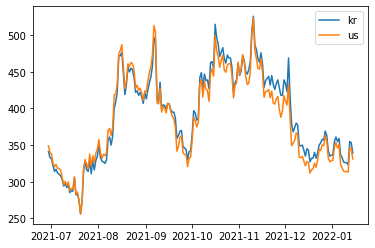

In [70]:
from pandas import Series, DataFrame
import pyupbit, ccxt
from datetime import datetime
from matplotlib import pyplot as plt

df_kr = pyupbit.get_ohlcv("KRW-XLM")
print(df_kr)

binance = ccxt.binance()
ohlcvs = binance.fetch_ohlcv('XLM/USDT',timeframe='1d')
# print(ohlcvs[0])
date = []
high = []

EXR = upbit_get_usd_krw()
for ohlc in ohlcvs:
    date.append(datetime.fromtimestamp(ohlc[0]/1000).strftime('%Y-%m-%d %H:%M:%S'))
    high.append(ohlc[2]*EXR)
    #print(datetime.fromtimestamp(ohlc[0]/1000).strftime('%Y-%m-%d %H:%M:%S'),ohlc[1],ohlc[2],ohlc[3])
    
df_us = DataFrame(high,index=date,columns=['high'])
df_us = df_us[-200:]
print(df_us)

plt.plot(df_kr.index,df_kr['high'],df_kr.index,df_us['high'])
plt.legend(['kr','us'])